## Project No1 - The Mind

Refer to the `README.md` for further information about how to play the game and the objectives for this first project. 

When writing code, we recommend you to be as modular as possible. For example, if you are running multiple experiments for different choices of parameters, it may be convenient to write a function that does one experiment and then make multiple calls to the same function. Follow the _do not repeat yourself_ rule when writing code! 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Let's start by creating a function that generates one sample of the game. Feel free to change this code as you find it suitable, for example by changing how the sampling is created or if you want to sample cards with replacement (this could be useful for the last questions).

In [3]:
def sample_cards(N, n, k):
    """
    Generates a simulated sample of how the cards are shuffled among players. 
    
    Arguments: 
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        
    Returns: 
        - 2D numpy array where each row represent each player and each column their card in ascending order. 
    """
    
    assert n * k <= N, "There are not enough cards for all the players!"
    
    _cards = np.random.choice(a=np.arange(1, N+1), size=n*k, replace=False)
    _cards = _cards.reshape(n,k)
    _cards.sort(axis=1)
    return _cards

Now we can just generate how cards are distributed among players by simply making a call to this function with the desired parameters. 

In [4]:
cards = sample_cards(100, 6, 3)
cards

array([[ 24,  46,  75],
       [ 47,  66,  70],
       [  6,  27,  85],
       [ 26,  39,  74],
       [ 23,  30,  77],
       [ 42,  76, 100]])

and access the cards of each player with 

In [5]:
player0 = cards[0,:]
player1 = cards[1,:]
player0, player1

(array([24, 46, 75]), array([47, 66, 70]))

The lowest card in the game is

In [6]:
np.min(cards)

6

In [7]:
np.arange(1, 5)

array([1, 2, 3, 4])

### 1. What is the distribution of the lowest number? 

Repeat the sampling of the cards multiple times for the same choice of `N`, `n` and `k` and plot the distribution of the lowest number in the sample. Use an [histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to plot the distribution and set the bins to be the available integer number cards. 

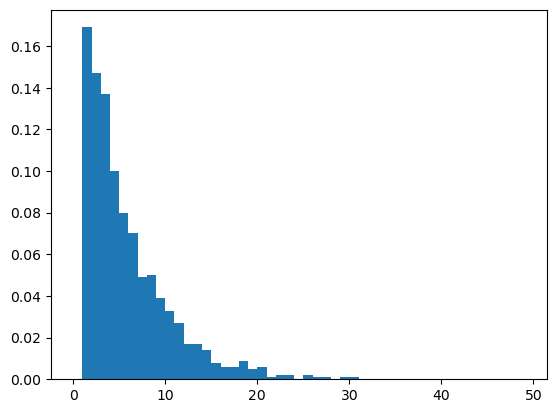

In [8]:
# To Do cell
repeat=1000
lows= []
N=100
n=6
k=3
for iterations in range(repeat):
    cards = sample_cards(N, n, k)
    lows.append(np.min(cards))
plt.hist(lows,bins=np.arange(0, 50),density=True)
plt.show()

### 2. What is the distribution of the largest gap?

For each simulation, found the largest distance between consecutive numbers in the game. To make this easy, let us first consider the largest gap among the pool of **all** the cards among players (if the largest gap is happening in the hand of one single player, that is ok). This will make the analysis more simple. 

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.100e+01, 5.200e+01, 2.060e+02, 4.080e+02, 6.860e+02,
        8.360e+02, 9.940e+02, 1.082e+03, 9.660e+02, 9.130e+02, 7.860e+02,
        6.570e+02, 4.920e+02, 3.990e+02, 3.190e+02, 2.950e+02, 1.960e+02,
        1.790e+02, 1.270e+02, 1.030e+02, 6.800e+01, 5.800e+01, 3.500e+01,
        3.400e+01, 2.500e+01, 2.500e+01, 1.200e+01, 1.300e+01, 9.000e+00,
        2.000e+00, 6.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 48 artists>)

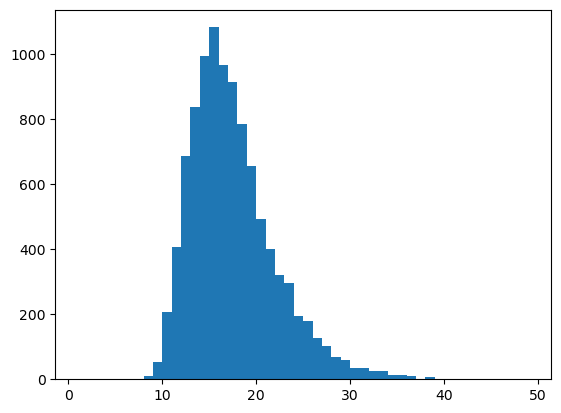

In [9]:
# To Do cell
rep = 10000
N = 100
n = 6
k = 3

np.random.seed(123)

def get_largest_gap(num_rep, N, n, k, same_player = True):
    """
    Run a simulation to get the distribution of the largest gap between player's ordered cards. 
    
    Arguments: 
        - num_rep : number of repititions
        - N : Total number of cards
        - n : Number of players
        - k : Number of cards per player
        - same_player : True if we allow the gap to come from the same hand
        
    Returns: 
        - 1D numpy array of the simulated largest gaps. 
    """
    gaps = []
    for i in range(num_rep):
        sample = sample_cards(N=N, n=n, k=3)

        ids = np.tile(np.arange(1, n+1), (k, 1)).T 

        #Order the cards
        flat_cards = sample.flatten()
        flat_ids = ids.flatten()
        order_ids = np.argsort(flat_cards)
        order_cards = flat_cards[order_ids]
        order_players = flat_ids[order_ids]

        gap_cards = np.diff(order_cards)
        
        if same_player:
            max_gap = np.max(gap_cards)
            
            gaps.append(max_gap)
        
        else:
            gap_ids = np.diff(order_players)
            gap_unique = gap_cards * (gap_ids != 0)
            max_gap_diff = np.max(gap_unique)
            gaps.append(max_gap_diff)
        
    return gaps

gaps_1 = get_largest_gap(rep, N, n, k)
plt.hist(x = gaps_1, bins = np.arange(1,50))

Repeat the experiment but know compute the largest gap between cards of different players. This is the gap that actually matters for the purposes of the game: what is the maximum number of numbers that a player will have to wait before playing the next card?

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 8.000e+00,
        1.200e+01, 5.600e+01, 1.670e+02, 3.280e+02, 5.900e+02, 7.890e+02,
        9.580e+02, 1.015e+03, 1.005e+03, 8.800e+02, 8.470e+02, 7.040e+02,
        5.400e+02, 4.430e+02, 3.350e+02, 2.700e+02, 2.420e+02, 1.830e+02,
        1.260e+02, 1.220e+02, 1.060e+02, 6.400e+01, 5.300e+01, 4.200e+01,
        2.500e+01, 1.900e+01, 1.400e+01, 1.600e+01, 1.600e+01, 4.000e+00,
        5.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
        14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
        27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
        40., 41., 42., 43., 44., 45., 46., 47., 48., 49.]),
 <BarContainer object of 48 artists>)

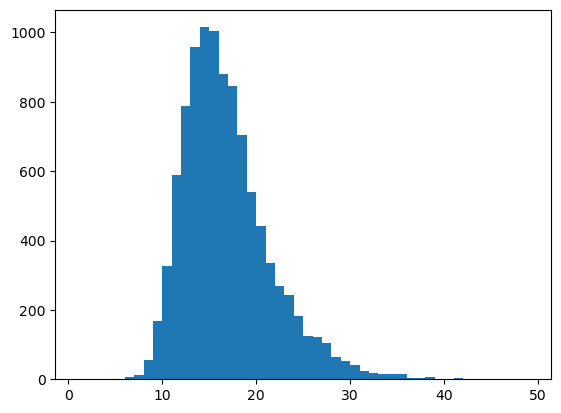

In [10]:
gaps_2 = get_largest_gap(rep, N, n, k, False)
plt.hist(x = gaps_2, bins = np.arange(1,50))

How does these compare? Run simulations for different choices of the number of cards and players and see when the difference between these two is larger. 

Compute the mean of the two distributions. When this difference is larger? How does this depends of the total number of players `n`?

Text(0.5, 0, 'Consecutive Difference')

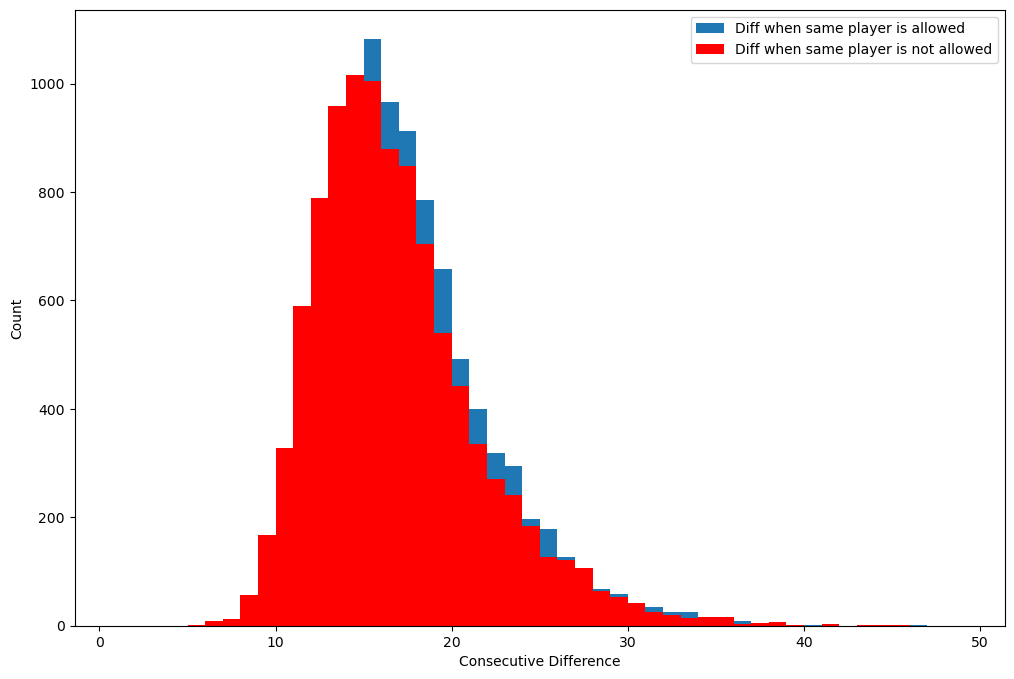

In [11]:
# To Do cell
fig1 = plt.figure(figsize=(12,8))

plt.hist(x = gaps_1, bins = np.arange(1,50), label = "Diff when same player is allowed")
plt.hist(x = gaps_2,bins = np.arange(1,50), color = 'red', label = "Diff when same player is not allowed")

plt.legend()
plt.ylabel('Count')
plt.xlabel('Consecutive Difference')

We see that the distribution generated from question 1 dominates the one generated from question 2. This is expected because in question 1, we are calculating maximums of consecutive numbers from a larger set, meaning the probability of seeing a larger number is larger. 

In [12]:
def simulate_diff_n (player_num):
    
    mean_diff = []
    for i in range(2, player_num+1):
        n = i
        gaps_1 = get_largest_gap(rep, N, n, k)
        gaps_2 = get_largest_gap(rep, N, n, k, False)
        
        mean_diff.append(np.round(np.mean(gaps_1) - np.mean(gaps_2)))
        
        print(np.mean(gaps_1) - np.mean(gaps_2), "for n =", n)
        
    return mean_diff

In [13]:
np.random.seed(123)

player_num = 20
y = simulate_diff_n(player_num)

7.098999999999997 for n = 2
2.990500000000001 for n = 3
1.5228000000000002 for n = 4
0.8953000000000024 for n = 5
0.593399999999999 for n = 6
0.373899999999999 for n = 7
0.3678000000000008 for n = 8
0.21729999999999983 for n = 9
0.2475000000000005 for n = 10
0.13279999999999959 for n = 11
0.15549999999999997 for n = 12
0.13129999999999953 for n = 13
0.07140000000000057 for n = 14
0.07540000000000013 for n = 15
0.05229999999999979 for n = 16
0.07509999999999994 for n = 17
0.07790000000000052 for n = 18
0.04400000000000048 for n = 19
0.05679999999999996 for n = 20


Text(0.5, 1.0, 'Number of players versus difference in distribution means')

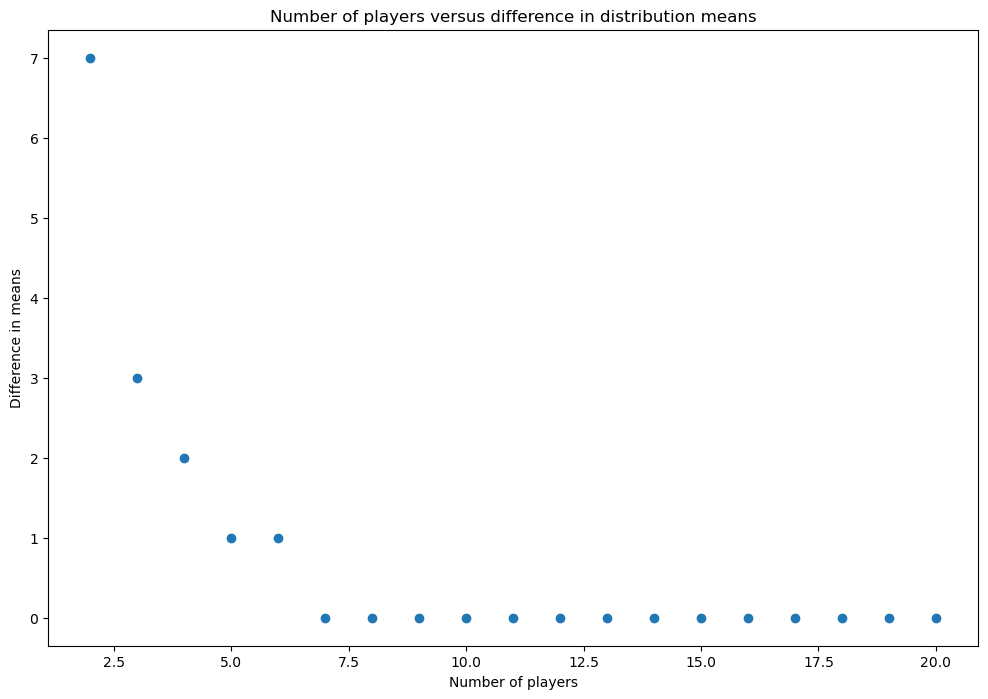

In [14]:
fig1 = plt.figure(figsize=(12,8))

plt.scatter(x = np.arange(2, player_num+1), y = y)
plt.xlabel('Number of players')
plt.ylabel('Difference in means')
plt.title("Number of players versus difference in distribution means")

### 3. Deriving distributions

For this section, we are going to use the random sampling generating process from _The Mind_ to investigate and find some familiar distributions.

### 3.1. Binomial Distribution 

Can you think about any way of deriving the binomial distribution? Based on the output of one single game (function `sample_game()`), try to derive something that has Binomial distribution for certain parameter $p$. Run multiple simulations to see this and compare the obtained empirical distribution with the distribution of the binomial distribution (check `numpy.random.binomial` and `scipy.stats.binom`). 

In [15]:
# To Do cell
#Get the result of one draw to be bernoulli, then get binomial
np.mean(np.array(gaps_1) - np.array(gaps_2))

0.6369

### 3.2. Beta Distribution

The [order statistics](https://en.wikipedia.org/wiki/Order_statistic) of the uniform distribution are such that follow a Beta distribution. If well here we are not exactly sampling real numbers in $[0,1]$ following the uniform distribution, you can imagine that sampling one single number without repetition from $\{ 1, 2, 3, \ldots, N \}$ is not very different...

Compare the distribution of the lowest number in the sample (Part 1) with a [Beta distribution](https://en.wikipedia.org/wiki/Beta_distribution) with adequate choices of parameters. In order to do this, notice that the $k$th order statistics of a sample of $n$ uniformly distributed points in $[0,1]$ is $\text{Beta}(k, n+1-k)$ (These $n$ and $k$ are not the same as before, you need to pick the right values of these).

In [16]:
# To Do cell

### 3.3. Exponential Distribution

If we call $U_1$ the minimum number in the sample (Part 1), then make an histogram with the distribution of the transformed random variable given by 
$$
X = - \ln \left( 1 - \frac{U_1}{N} \right)
$$
and compare this with the distribution of an exponential random variable with parameter $nk$, the total number of cards in the game. 

### 4. What happens when $n * k << N$?

Some of the distribution we saw in previous sections are just approximate. Study what happens when we increase the number of cards. Try to understand how the cases of sampling with and without reposition compare as $n * k << N$. What do you expect to see in these cases? When the difference between the two sampling strategies will lead to similar or different results. 

In [17]:
# To Do cell

### Contribution statement

Please include a list of the students you work with along this project (including yourself). Include both names and GitHub usernames of the people you collaborated with. Maximum of three persons per group. 
- Member No1: 
- Member No2: 
- Member No3: